# Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar output label (or dependent variable) and one or more explanatory variables (or features/attributes). The case of one explanatory variable is called a simple linear regression.

We will understand it with a practice example, Steps we are going to follow are :
1. Importing important libraries
2. Importing the data
3. Feature selection
4. Data visualization
5. Finding weight (slope) and bias (intercept) of the fitting line for single feature variable
6. Visualizing the fitted line
7. Finding weight (slope) and bias (intercept) of the fitting line for multiple feature variables
8. Comparing fitted line obtained from scikit-learn model (A machine learning library)

**1. Importing important libraries**

In [1]:
# IMporting importatnt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing model
from sklearn.linear_model import LinearRegression

**2. Importing Data.**


Importing the required data for the prediction of sales is taken from kaggle.

Link to the dataset --> https://www.kaggle.com/sazid28/advertising.csv

In [2]:
#read the file and store as dataframe
data = pd.read_csv('Advertising.csv', index_col=[0])

# Let's see the top five rows of the dataset
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**3. Feature Selection.**

In [3]:
# Columns we have
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
# First we will implement a single variable linear regression model
# Let's take Tv  as our variable to find the sales

price_data=data[['TV', 'sales']]
price_data.head()

,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


**4. Data Visualization.**

Before we start with the linear regression, we should check if our dependent and independent variables are linearly related or not. We can check it on scatter plot:

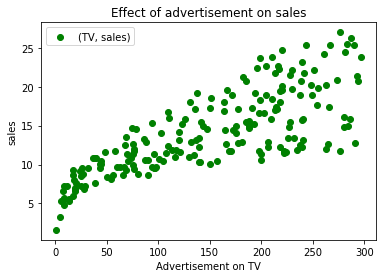

In [5]:
#Let's distribute our house price data set into X(Feature variable, area of the house) and y(the price of the house) 

X=price_data['TV']
y=price_data['sales']

# Let's plot it and try to visualize the data
# Plot blank figure with the axis
figure, ax =plt.subplots()

# Plot a scatter plot for feature
ax.scatter(X, y, color='green')

# Set titles and axis labels
ax.set_title('Effect of advertisement on sales')
ax.set_xlabel('Advertisement on TV')
ax.set_ylabel('sales')

# Set legends
ax.legend(labels=['(TV, sales)']);

From the above graph, we can see that feature variable is linearly related with dependent variable

**5. Finding weight(slope) and constant(intercept) of the fitting line.**

To find the fitting line `y=w*X + b` we have to find out the value of `w`( the slope of the line) and `b` (intercept of the line) by the Least Square fitting method:

![title](least_square_fitting.jpg)

Where:
* `x bar` = mean of X
* `y bar` = mean of y

In [7]:
# finding X_mean and y_mean

X_mean = X.mean()
y_mean = y.mean()

# finding th value of m and c
denominator=0
numerator=0
for i in range(1, len(X)+1):
    numerator+=(X[i] - X_mean)*(y[i] - y_mean)
    denominator+=(X[i] - X_mean)**2
    
w = numerator/denominator
b = y_mean - X_mean * w
print(f'The value of slope(w): {w*1:.2f}')  # value of slope(m) upto two decimal place
print(f'The value of intercept(b): {b:.2f}')  # value of intercept(c) upto two decimal place

The value of slope(w): 0.05
The value of intercept(b): 7.03


**6. Visualizing fitting line.**

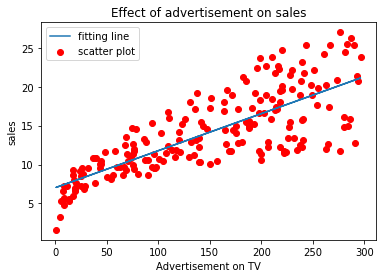

In [8]:
# Let's draw the fitting line into the House pricing dataset.
# Make a figure with axis 
figure1, ax =plt.subplots()

# Plot feature
ax.scatter(X, y, color='red')

# Set title and axis labels
ax.set_title('Effect of advertisement on sales')
ax.set_xlabel('Advertisement on TV')
ax.set_ylabel('sales')

# Plot fitting line
y_axis = w* X + b
ax.plot(X, y_axis)

# Set Legends
ax.legend(labels=['fitting line', 'scatter plot']);

**7. Finding weights and constants for multi-variable Linear regression problem using vector formulation**

In [17]:
#importing data
data1=data[['TV', 'radio', 'newspaper']]

# including a column of one to find the value of intercept simultaneously
data1['ones']=pd.DataFrame([1]*(len(data)+1));
#data1.head()

In [18]:
# converting into array form to do matrix multiplication to find out weights using the vector method.
X=np.array(data1)
y=np.array(data['sales'])

Mathemtical formulation for finding out weights for the 3 features is:

![title](images.png)

and then the prediction can be calculated as

![title](images2.png)


In [19]:
# vector multiplication to find weight vector
w = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(np.transpose(y))
#print(w)
#print(X)

In [20]:
print(f'weight(w) vector for our multi feature variables is {w[1:]}')
print(f'intercept(b) vector for our multi feature variables is {w[0]:.2f}')

weight(w) vector for our multi feature variables is [ 1.88530017e-01 -1.03749304e-03  2.93888937e+00]
intercept(b) vector for our multi feature variables is 0.05


In [23]:
# Predicting y from the calculated weight and intercept
y_pred1 = X.dot(np.transpose(w))

In [27]:
y_pred1[:5]

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186])

you cn find about R2 score from this website:
https://www.britannica.com/science/coefficient-of-determination

In [20]:
# finding the accuracy
from sklearn.metrics import r2_score
print(f'accuracy obtained is {r2_score(y, y_pred1)*100:.2f}%')

accuracy obtained is 89.72%


**8. comparing fitting line obtained from scikit-learn model (A machine learning library)**

**Linear regression with single feature variable**

Accuracy we obtain from the model is 61.19%


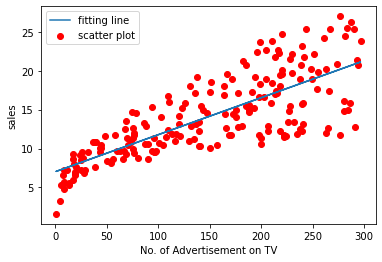

In [33]:
# setting a model
model1 = LinearRegression()

X=data['TV']
#print(X[:5])

# reshaped 1-D 'X'
X = np.array(X)

#print(X[:5])
X = X.reshape(-1, 1)  

#print(X[:5])
# Fitting the data into model
model1.fit(X, y)

#Evaluate our model
print(f'Accuracy we obtain from the model is {model1.score(X, y)*100:.2f}%')
# predicting y value

y_pred2 = model1.predict(X)

# plot our predicted price we getting as y_pred with old x we should get the same plot

figure2, ax = plt.subplots()
ax.scatter(X, y, color='red')
ax.plot(X, y_pred2)
ax.set_xlabel('No. of Advertisement on TV')
ax.set_ylabel('sales')
ax.legend(labels=['fitting line', 'scatter plot']);

**Multi-variable linear regression using scikit-learn library**

Here we are going to do a practice problem on multivariate features using machine learning libraries:

In [23]:
# obtaining data
sales_data = pd.read_csv('Advertising.csv', index_col=[0])
sales_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [24]:
sales_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

1. Distribution of the feature variables:


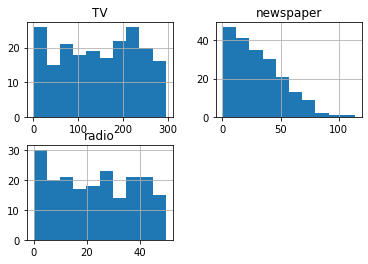

2. Accuracy from the Linear regression model: 89.94%


In [26]:
# Now we take Area(SqFt), Number of bedroom(Bedrooms) and  Number of bathrooms(Bathrooms) as our feature varibales

feature_variable = sales_data[['TV', 'radio', 'newspaper']]

# Let's see the distribution of the feature variable though histogram plot.
print('1. Distribution of the feature variables:')
feature_variable.hist()
plt.show()

# Price of the house
sales = sales_data[['sales']]

# We set our X and y variable
X=feature_variable
y=sales

#set a particular random variable so that answer obtained can be the same for everyone and everytime
np.random.seed(42)

# spliting the data into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# fitting our data into model
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train, y_train)

# Evaluating model
print(f'2. Accuracy of the Linear regression model: {model2.score(X_test, y_test)*100:.2f}%' )